In [1]:
#https://github.com/LCAV/pyroomacoustics/blob/master/examples/bss_example.py 

In [82]:
import pyroomacoustics as pra
import librosa
import os
BASE_FOLDER =  r'../../'
filepath = r'\dataset\min6dB\pump\id_02\abnormal\00000022.wav'
audio , fs = librosa.load(os.path.abspath(BASE_FOLDER+filepath), sr=None, mono=False)

In [83]:
# STFT analysis parameters
fft_size = 4096  # `fft_size / fs` should be ~RT60
hop = fft_size // 2  # half-overlap
win_a = pra.hann(fft_size)  # analysis window
# optimal synthesis window
win_s = pra.transform.compute_synthesis_window(win_a, hop)

In [84]:
X = pra.transform.analysis(audio.T, fft_size, hop, win=win_a)

In [85]:
X.shape

(79, 2049, 8)

In [88]:
# Separation
#Y = pra.bss.auxiva(X, n_iter=30, proj_back=True)
#Y = pra.bss.ilrma(X, n_iter=30, proj_back=True, n_components=8n_src=2)
#Y = pra.bss.fastmnmf(X,  n_iter=30, n_components=8, n_src=2)
#ratio = 0.35
#average = np.abs(np.mean(np.mean(X, axis=1), axis=0))
#k = np.int_(average.shape[0] * ratio)
#S = np.sort(np.argpartition(average, -k)[-k:])
# Run SparseAuxIva
Y = pra.bss.sparseauxiva(X, S, n_iter=30, proj_back=True)

ValueError: could not broadcast input array from shape (2049,2) into shape (2049,8)

In [70]:
# iSTFT (introduces an offset of `hop` samples)
# y contains the time domain separated signals
# y.shape == (new_nsamples, nchannels)
y = pra.transform.synthesis(Y, fft_size, hop, win=win_s)

In [71]:
y = y.T
y.shape

(2, 161792)

In [72]:
BASE_FOLDER = '../../'
%run -i ..\..\utility\feature_extractor\JupyterLoad_feature_extractor.py
def psd(d):
    psd = feature_extractor_welchPSD(BASE_FOLDER)
    psd.set_hyperparamter(channel='all', multichannel='stack')
    mf = memory_wave_file()
    mf.filepath = filepath
    mf.srate = fs
    mf.channel = d
    psd.create_from_wav(mf)
    psd.plot()
    plt.legend()
    plt.show()

load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd
load feature_extractore_pre_nnFilterDenoise
load extractor_diagram_mother


In [79]:
%matplotlib qt
psd(y)


In [74]:
from IPython.display import display, Markdown, Audio


In [75]:
print(np.linspace(0,10, len(y[0])).shape)
y[0].shape

(161792,)


(161792,)

#### mix 

#### source 0

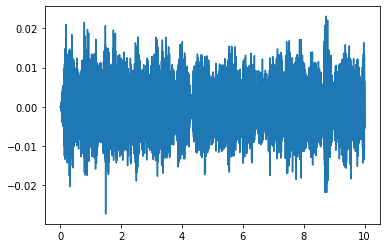

#### source 1

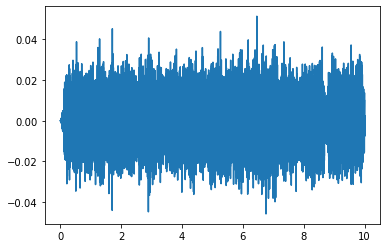

#### source 2

IndexError: index 2 is out of bounds for axis 0 with size 2

In [77]:
%matplotlib inline
display(Markdown('#### ' + 'mix ' ))


display(Audio(data=audio[0],rate=fs))
for i in range(8):
    display(Markdown('#### ' + 'source ' + str(i)))
    display(Audio(data=y[i],rate=fs))
    plt.plot(np.linspace(0,10, len(y[i])),y[i])
    plt.show()